## Load data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
from google.colab import files

In [2]:
uploaded = files.upload()

In [3]:
# First dataset - Areej: hate speech or not
df1 = pd.read_csv('hate_speech.csv')
df1.drop(['index'], axis=1, inplace=True)
df1.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


In [4]:
df1['label'].value_counts()

0    8770
1    1155
Name: label, dtype: int64

In [5]:
# Second dataset - offensive and non-offensive
df2 = pd.read_csv('labeled_tweets.csv')
df2.drop(['id'], axis=1, inplace=True)
df2.label = df2.label.map({'Non-offensive': 0, 'Offensive': 1})
df2 = df2.rename(columns={'full_text': 'post'})
df2 = df2[['post', 'label']]
df2

,post,label
0,So Drasko just said he was impressed the girls...,1
1,So Drasko just said he was impressed the girls...,1
2,Drasko they didn't cook half a bird you idiot ...,1
3,Drasko they didn't cook half a bird you idiot ...,1
4,Hopefully someone cooks Drasko in the next ep ...,1
...,...,...
11085,RT @Transition: @freebsdgirl just so I’m clear...,0
11086,RT @Leonard_Delaney: @freebsdgirl I know! Holy...,0
11087,"FLOSS Weekly, open source projects, and paying...",0
11088,RT @Kasparov63: My WSJ article on Boris Nemtso...,0


In [6]:
df2['label'].value_counts()

0    8136
1    2954
Name: label, dtype: int64

In [7]:
# Third dataset - davinson - 0: hate speech, 1: offensive, 2: neither
df3 = pd.read_csv('public_data_davidson.csv')
df3.drop(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)
df3['class'] = df3['class'].map({0: 1, 1: 1, 2: 0})
df3 = df3.rename(columns={'class': 'label', 'tweet': 'post'})
df3 = df3[['post', 'label']]
df3.head()

,post,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [8]:
df3['label'].value_counts()

1    20620
0     4163
Name: label, dtype: int64

In [9]:
frames = [df1, df2, df3]
df = pd.concat(frames)

In [10]:
print('Dataset size:', df.shape)
print('Columns are:', df.columns)

Dataset size: (45798, 2)
Columns are: Index(['post', 'label'], dtype='object')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45798 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    45798 non-null  object
 1   label   45798 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [12]:
df.shape

(45798, 2)

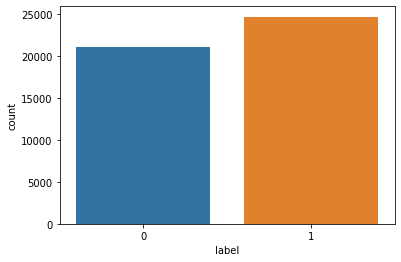

In [13]:
sns.countplot(x = 'label', data = df);

In [14]:
df.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


In [15]:
df.to_csv('combine_dataset.csv', index=False, header=True)

## Cleaning text data

In [16]:
def remove_RT(text):
    text = re.sub('RT @\w*', '', text)
    return text

In [17]:
df['post'] = df['post'].apply(lambda x: remove_RT(x))

In [18]:
print('shape before removing duplicates:', df.shape)

shape before removing duplicates: (45798, 2)


In [19]:
df.drop_duplicates(subset ="post", inplace = True) 

In [20]:
print('shape after removing duplicates:', df.shape)

shape after removing duplicates: (45600, 2)


In [21]:
df['label'].value_counts()

1    24656
0    20944
Name: label, dtype: int64

In [22]:
df[df['label']==1]

,post,label
3,click below for a free download of a colorfull...,1
9,she may or may not be a jew but she s certainl...,1
19,i ve always considered teaching as one of the ...,1
20,and the sad thing is the white students at tho...,1
29,their gods often had pale skin and blue eyes b...,1
...,...,...
24776,you're all niggers,1
24777,you're such a retard i hope you get type 2 dia...,1
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24780,young buck wanna eat!!.. dat nigguh like I ain...,1


In [23]:
df.head()

,post,label
0,simply copy and paste the following text into ...,0
1,in order to help increase the booklets downloa...,0
2,as of march 13th 2014 the booklet had been dow...,0
3,click below for a free download of a colorfull...,1
4,click on the download 7 42 mb green banner link,0


In [24]:
df['post'] = df['post'].apply(lambda x: re.sub(r' http\S+', '', x, flags=re.MULTILINE))
df['post'] = df['post'].apply(lambda x: re.sub(r'pic\.twitter\.com\/\S*', '', x))
df['post'] = df['post'].apply(lambda x: re.sub('\n', '', x))
df['post'] = df['post'].str.replace(r'\s+', ' ')

In [25]:
df.to_csv('cleaned_dataset.csv', index=False, header=True)